### Module and data import

Import the necessary modules

In [82]:
# import the modules needed for the whole notebook
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

Define a data import function that returns a pandas dataframe created from a given csv file with a header row as column names and the first column as the index.

In [2]:
# import a comma=separated file at the given filepath and return a dataframe with the first row of the file as the column 
# headers and the first column as the index of the dataframe.
def csvToDFWithHeaderAndIndex(filePath):
    try:
        df = pd.read_csv(filePath, delimiter=',', header=0, index_col=0)
    except FileNotFoundError:
        print('Error: data file "' + filePath + '" was not found. Please check the filepath given is correct and that the data file is present')
    return df

Import the data and create our dataframe

In [3]:
# import our datafile and build a dataframe from it. 
df = csvToDFWithHeaderAndIndex('data.csv')

## Data preprocessing

Check the shape of the dataframe to see how many rows and columns we have

In [4]:
# find the number of rows and columns in our dataframe
df.shape

(569, 32)

Check our dataframe for null values.

In [5]:
# check for null value counts in our dataframe columns
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

We can see that there is one column that contains many null values. Let's check if it's entirely null values.

In [6]:
# check if the number of null values in the column matches the number of rows in the dataframe.
df['Unnamed: 32'].isnull().sum() == df.shape[0]

True

Every row in this column has a null value so we can safely remove that column. In fact let's do that for all columns that are entirely null values.

In [7]:
# define a function that would drop inplace all columns which have entirely null values in them in from the given dataframe
def dropNullColumnsInPlace(dataframe):
    for column in dataframe.columns:
        if dataframe[column].isnull().sum() == dataframe.shape[0]:
            dataframe.drop(column, axis=1, inplace=True)

In [8]:
dropNullColumnsInPlace(df)

Let's recheck our null value counts

In [9]:
# check for null value counts in our dataframe columns
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Null values have been removed from the data. What datatypes do we have in our columns and do we have any columns with multiple datatypes?

In [10]:
# get some summary information about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

We have almost entirely numerical data, except the data column which should be categorical data. It would be better to change the datatype of this column from object to categorical.

In [11]:
# change the datatype of the diagnosis column values to 'category'
df['diagnosis'] = df['diagnosis'].astype('category')

### Establishing First Normal Form

In [12]:
# check the datatype of the 'diagnosis' column
df['diagnosis'].dtype

CategoricalDtype(categories=['B', 'M'], ordered=False)

We can see above from the 'dtype' property of the 'diagnosis' column in the dataframe that there are two catergories only: 'B' or 'M'. There are no comma separated values in this column for any samples. The rest of the columns we already know contain decimal values therefore all columns contain only scalar values. This is important in establishing that our dataframe is in First Normal Form. 

We should also check for any duplicates in the table.

In [13]:
# check the index column (sample numbers) has only unique values
df.index.is_unique

True

Our index values (which were the sample ids in the original data) are unique indicating that we have no repeating samples in the dataframe. Having established that our table is made up of columns containing scalar values and that no entities are repeated we can say that our dataframe is in first normal form (1NF). 

## Statistical Analysis

### How balanced is the dataset?

In terms of choosing our ML model and setting its hyperparameters and also for understanding our statistical analysis and visualistations more clearly we should try to understand how balanced (or imbalanced) our dataset is in term of the two categories of the target array. 

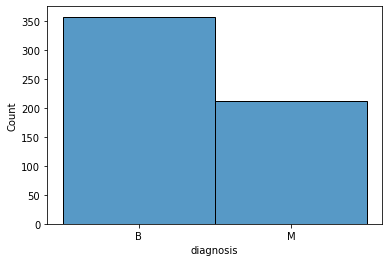

In [183]:
# plot a histogram of the two subsets of the target array.
sns.histplot(df['diagnosis'])
plt.show()

In [192]:
# divide number of benign samples by the number of metastatic samples
df.loc[df['diagnosis'] == 'B'].shape[0] / df.loc[df['diagnosis'] == 'M'].shape[0]

1.6839622641509433

The dataset includes more benign examples than malignant by a factor of approximately 1.68. This is not a significant relative imbalance in the dataset and there is also not an absolute imbalance where the number of our smaller subset (in this case metastatic samples) is very low.

### Overview of the dataset

To get an overall statistical summary of each of the features of our data we can call the discribe function on the dataframe.

In [193]:
# get a table of summary statistics for the whole dataframe (numerical columns)
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


By looking at the column names above and refering to the data dictionary that comes with this dataset we can see that 
our data contains 30 feautures that could naturally be grouped into three parts, i.e. means of the measurements taken on each image ('mean'), standard error of the meaurements taken on each image ('se') and largest of the measurements taken on each image ('worst'), which is actually the mean of the three largest measurements, it makes sense to group our data by these 3 groups including the diagnosis column for further analysis.

In [194]:
#create three new dataframes by filtering the main dataframe on the column titles.
df_mean_values = df.filter(regex='_mean|diagnosis', axis=1)
df_se_values = df.filter(regex='_se|diagnosis', axis=1)
df_worst_values = df.filter(regex='_worst|diagnosis', axis=1)

#perform a visual check that we have separated our columns correctly
print('df_mean_values, of shape ' + str(df_mean_values.shape) + ' columns are: \n' + str(df_mean_values.columns.values) + '\n')
print('df_se_values, of shape ' + str(df_se_values.shape) + ' columns are: \n' + str(df_se_values.columns.values) + '\n')
print('df_worst_values, of shape ' + str(df_worst_values.shape) + ' columns are: \n' + str(df_worst_values.columns.values) + '\n')

df_mean_values, of shape (569, 11) columns are: 
['diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean']

df_se_values, of shape (569, 11) columns are: 
['diagnosis' 'radius_se' 'texture_se' 'perimeter_se' 'area_se'
 'smoothness_se' 'compactness_se' 'concavity_se' 'concave points_se'
 'symmetry_se' 'fractal_dimension_se']

df_worst_values, of shape (569, 11) columns are: 
['diagnosis' 'radius_worst' 'texture_worst' 'perimeter_worst' 'area_worst'
 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']



The describe function gets us useful tabular data but in order to more quickly perceive features of the data it would be better to visualise the distributions of each of the measurements.

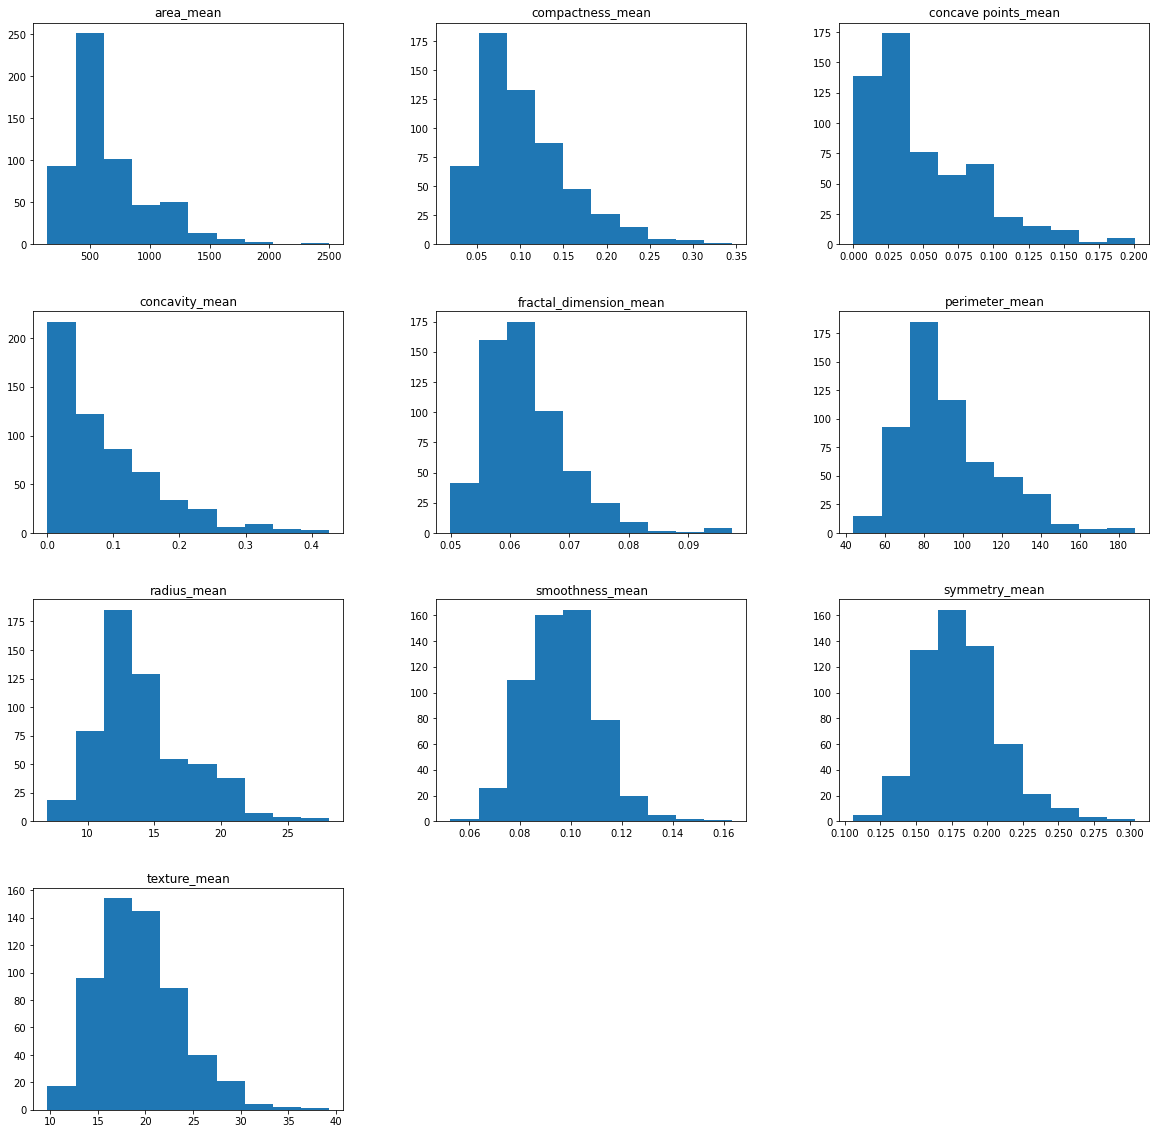

In [195]:
# plot a grid of histograms of the mean value measurements from our dataset.
df_mean_values.hist(backend='matplotlib', figsize=(20,20), grid=False)
plt.show()

As can be seen above the 10 different mean measurements taken from images of the samples in the dataset are generally distributed continuously and unimodally, some of the distributions are skewed heavily to the left (or negatively).

At the moment these distributions do not tell us much about the potential differences in the distributions of our measurements between the two 'diagnosis' categories of benign or malignant.

### Comparing benign and metastatic distributions

To see this we should separate the distributions by the diagnosis, this should give us a visual indication of whether we might be able to distinguish between the two sets with the given features and which features might be useful for accomplishing that.

I have not normalised the size of each of the sets of the target array to each other so it should be noted that heights of peaks are not directly comparable nor should any area under the curve analysis be performed at this stage.

In [245]:
# INSERT COMMENTS ON THIS FUNCTION
def distributionHistogramComparison(dataframe, nGridRows, nGridCols, hue=None, figsize=(20,20), title=None):
    fig, axs = plt.subplots(nGridRows, nGridCols, figsize=figsize)
    
    fig.suptitle(title, y=0.92 ,fontsize='xx-large')

    i, j = 0, 0
    for column in dataframe.columns:
        if column == hue:
            continue
        sns.histplot(ax=axs[i][j], data=dataframe, x=column, hue=hue, kde=True)
        metastatic = dataframe.loc[dataframe['diagnosis'] == 'M', column]
        benign = dataframe.loc[dataframe['diagnosis'] == 'B', column]
        ksResult = sp.stats.kstest(metastatic, benign, alternative='two-sided')
        if ksResult[1] < 0.001:
            chartKsText = "KS test \n" + "score: " + str(np.round(ksResult[0],2)) + "\n" + "p-value: <0.001"
        else:
            chartKsText = "KS test \n" + "score: " + str(np.round(ksResult[0],2)) + "\n" + "p-value: " + str(np.round(ksResult[1],4))
        axs[i][j].text(0.65, 0.65, chartKsText, transform=axs[i][j].transAxes, fontsize=14, verticalalignment="top")
        
        if j < nGridCols-1:
            j += 1
        else:
            i += 1
            j = 0
    while j < nGridCols:
        axs[i][j].remove()
        j += 1
    plt.show()

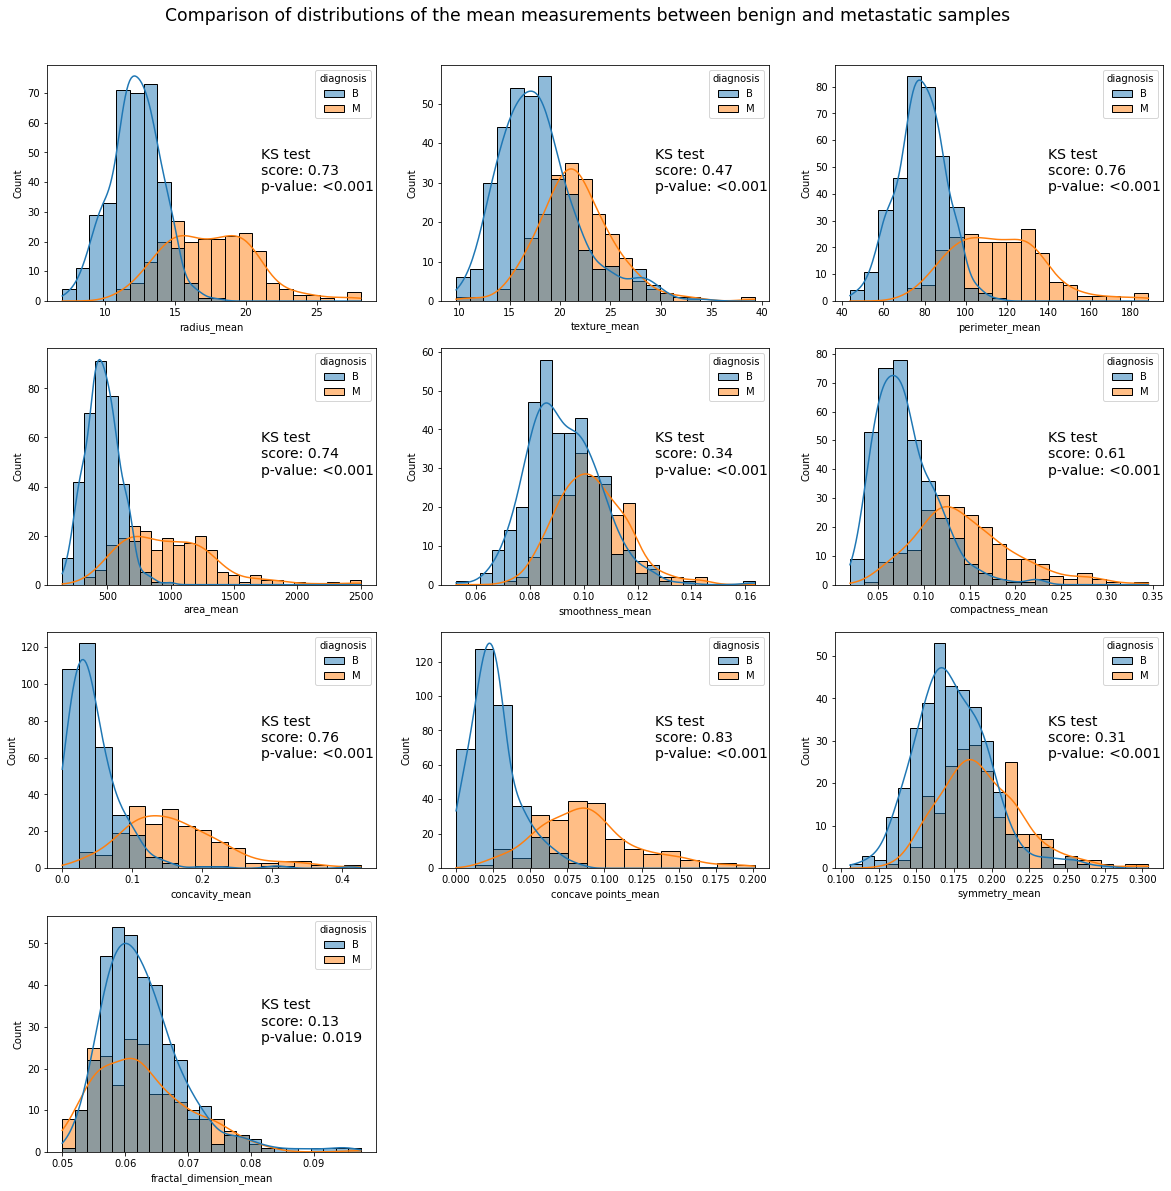

In [246]:
distributionHistogramComparison(dataframe=df_mean_values, hue='diagnosis', nGridRows=4, nGridCols=3, 
                       title='Comparison of distributions of the mean measurements between benign and metastatic samples')

The distributions of both the begnin and metastatic samples across the ten mean measurements in our dataset can be seen in the histograms above. KDEs were also plotted to give a better indicaiton of shape than the bins alone.

For each column (plot) a two-sided Kolmogorov-Smirnov (KS) test was performed and the respective graphs are annotated with both the D-score and p-value. The KS test can be used to compare two continuous distributions for similarity, the D-score can be thought of as distance between the distributions with 1 as completely different and 0 as identical. The p-value gives us the likelyhood that these two distributions could have been sampled from distributions at the distance of the D-score by chance.  

As can be seen from the plots there are a number of features in our dataset that it seems could allow us to differentiate between the two sets in the target array. Namely the features based on size of the nucleii such as radius, perimeter and area, but also concavity observed too. The comparison of the distributions seen in the symmetry and fractal dimension measurements appear to be less helpful to us in that regard.

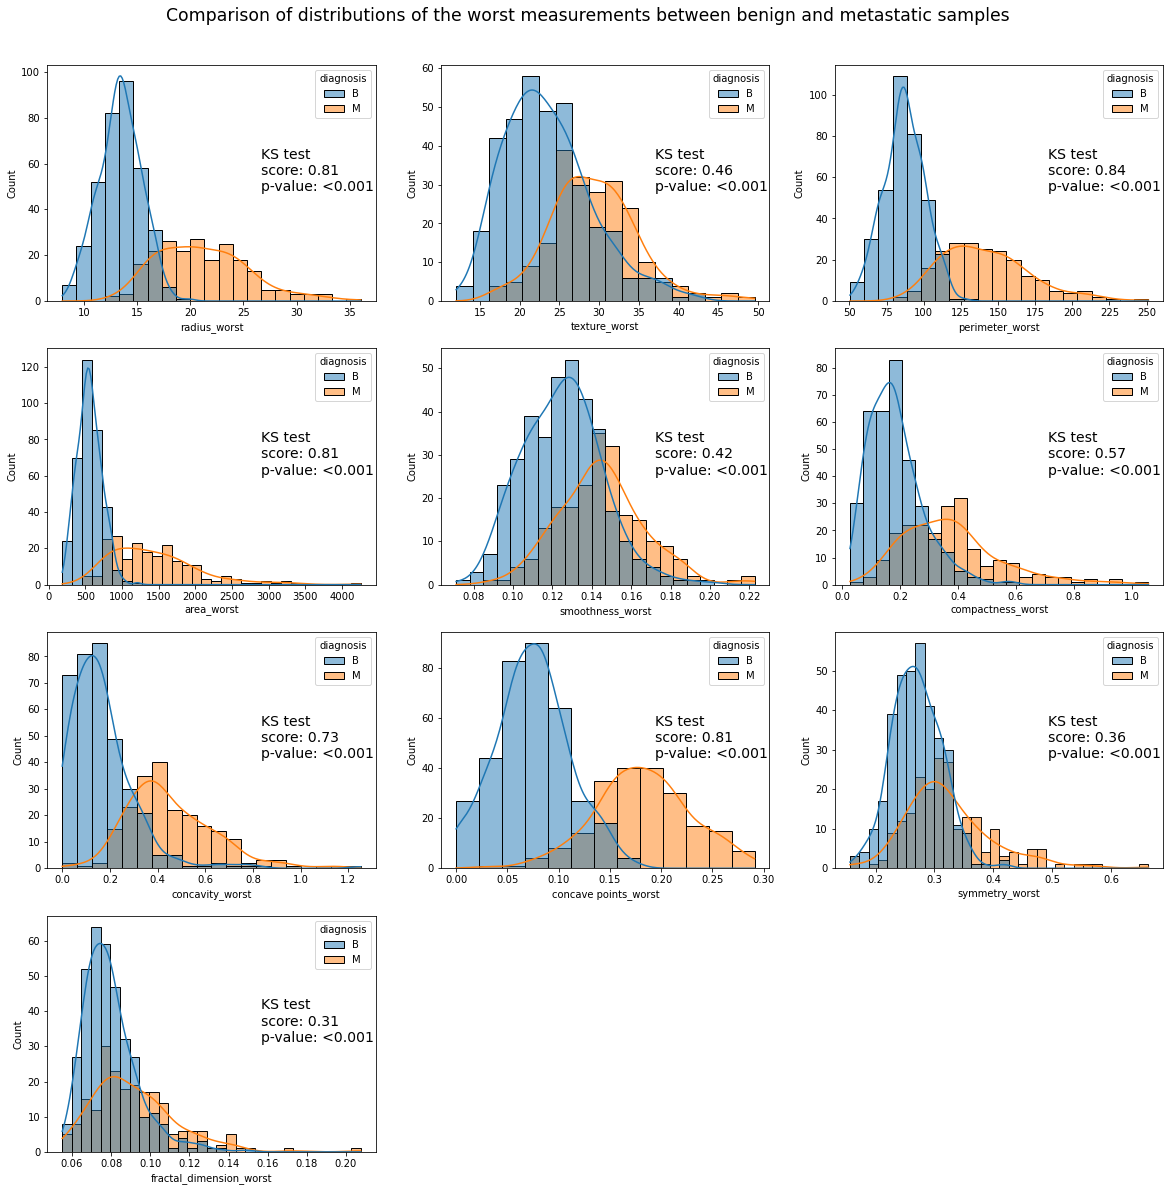

In [247]:
distributionHistogramComparison(dataframe=df_worst_values, hue='diagnosis', nGridRows=4, nGridCols=3, 
                       title='Comparison of distributions of the worst measurements between benign and metastatic samples')

Above we are comparing the distributions of the worst (i.e. mean of the 3 largest measurements taken) for the 10 features between benign and metastatic samples.

Again, we can see from the visualisations and the KS scores that we have some features in our dataset (particularly concavity and size-based measurements) where we should be able to differentiate between metastatic and benign samples. 

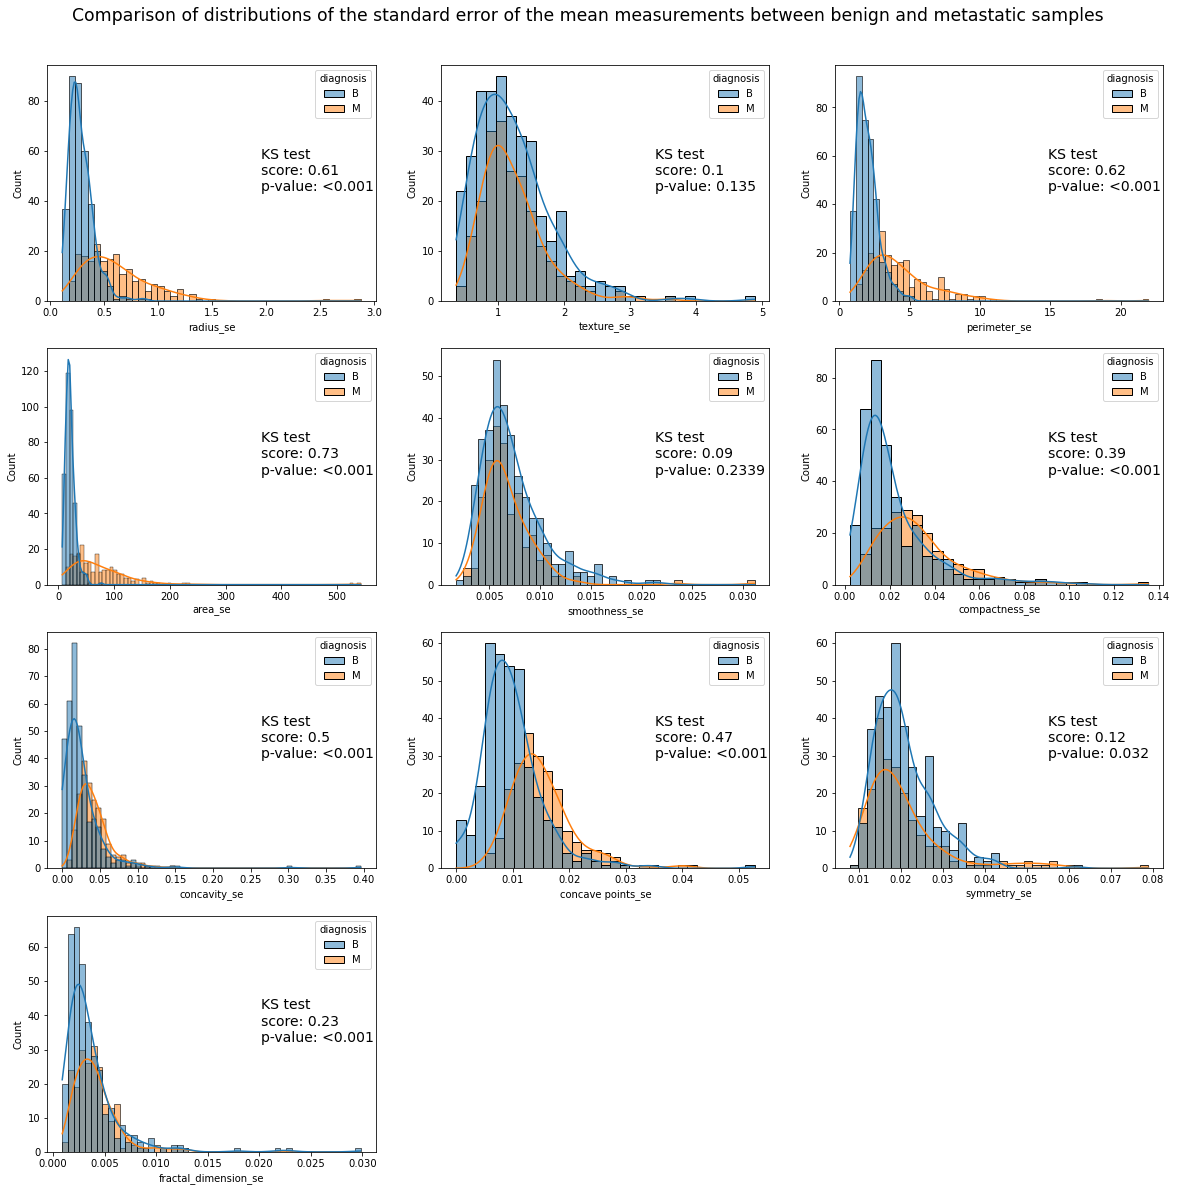

In [248]:
distributionHistogramComparison(dataframe=df_se_values, hue='diagnosis', nGridRows=4, nGridCols=3, 
                       title='Comparison of distributions of the standard error of the mean measurements between benign and metastatic samples')

The final third of our dataset is comprised of the se error values for the means of the measurements taken for each sample. As expected these features will be less powerful for classifying between the two sets of the target array and should likely not be included in the ML model. 

### Further distribution visualisations 

The histograms above give us a good indication of the differences seen between the 

From these graphs and the above analysis we can conclude that it is worth pursuing a Machine Learning approach towards our objectives and that we should be able to perform some dimensionality reduction on our dataset while retaining its key features.

In [22]:
def boxplotGridOnDfFiltered(filterTerm, dataframe):
    fig, axs = plt.subplots(3, 4, figsize=(22,22))

    i, j = 0, 0
    for column in df.filter(regex=filterTerm, axis=1).columns:
        sns.boxplot(ax=axs[i][j], x='diagnosis', y=column, data=dataframe)
        if j <= 2:
            j += 1
        else:
            i += 1
            j = 0
    axs[2,2].remove()
    axs[2,3].remove()

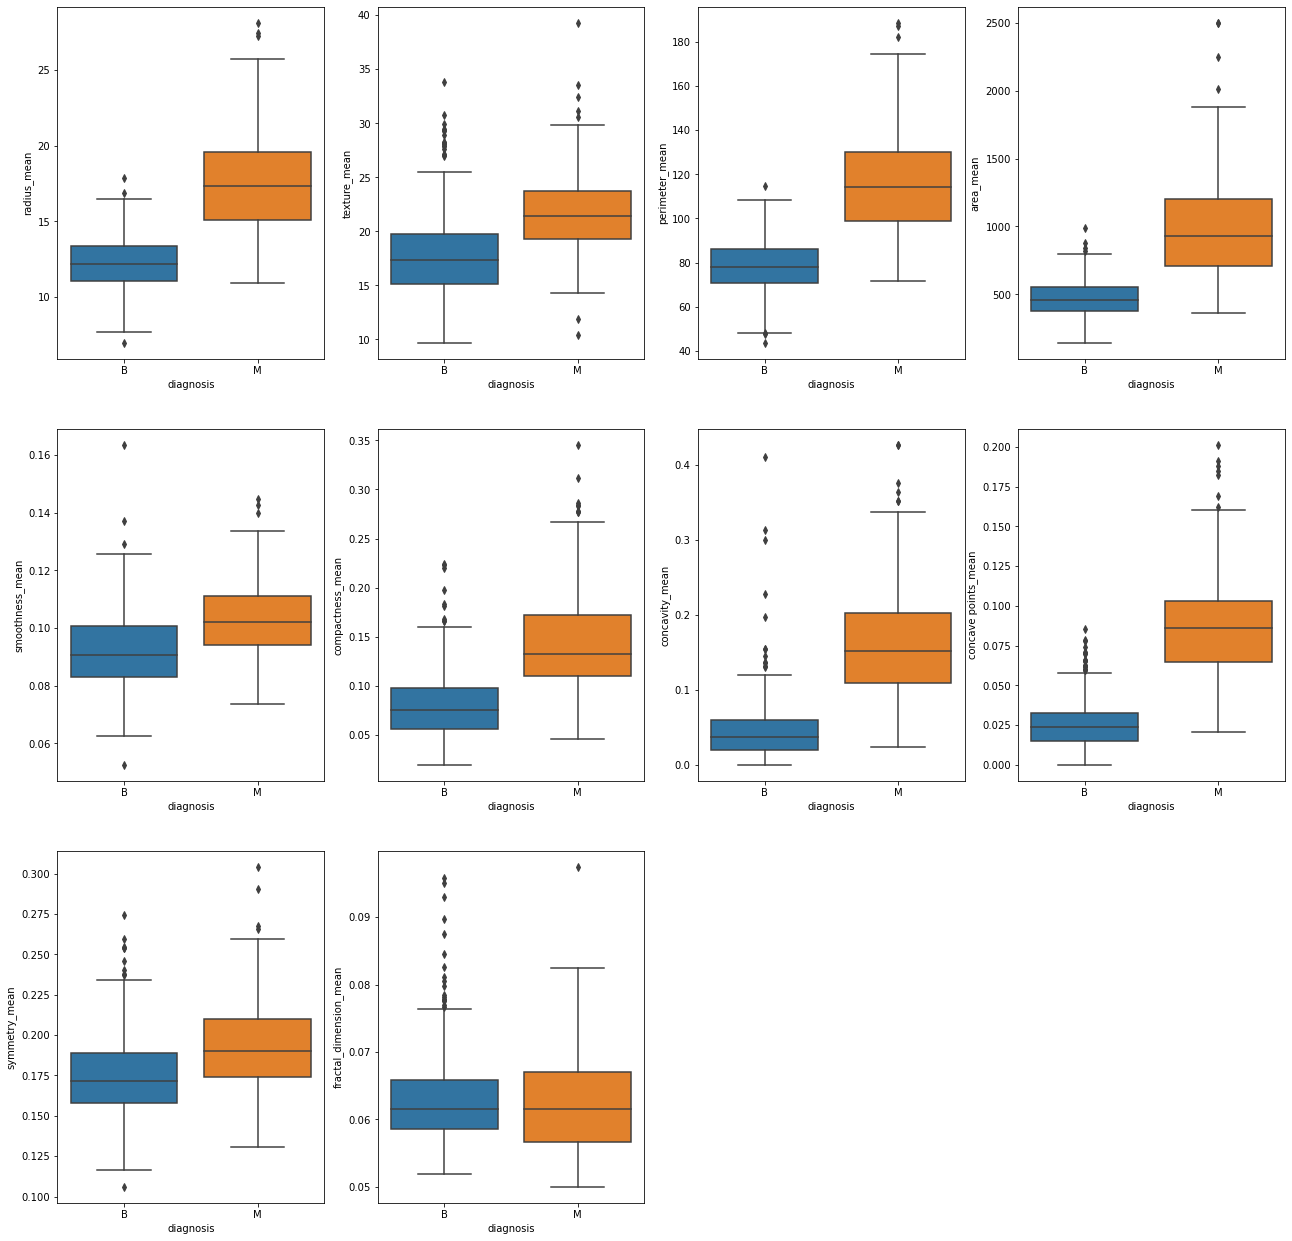

In [23]:
boxplotGridOnDfFiltered('mean', df)

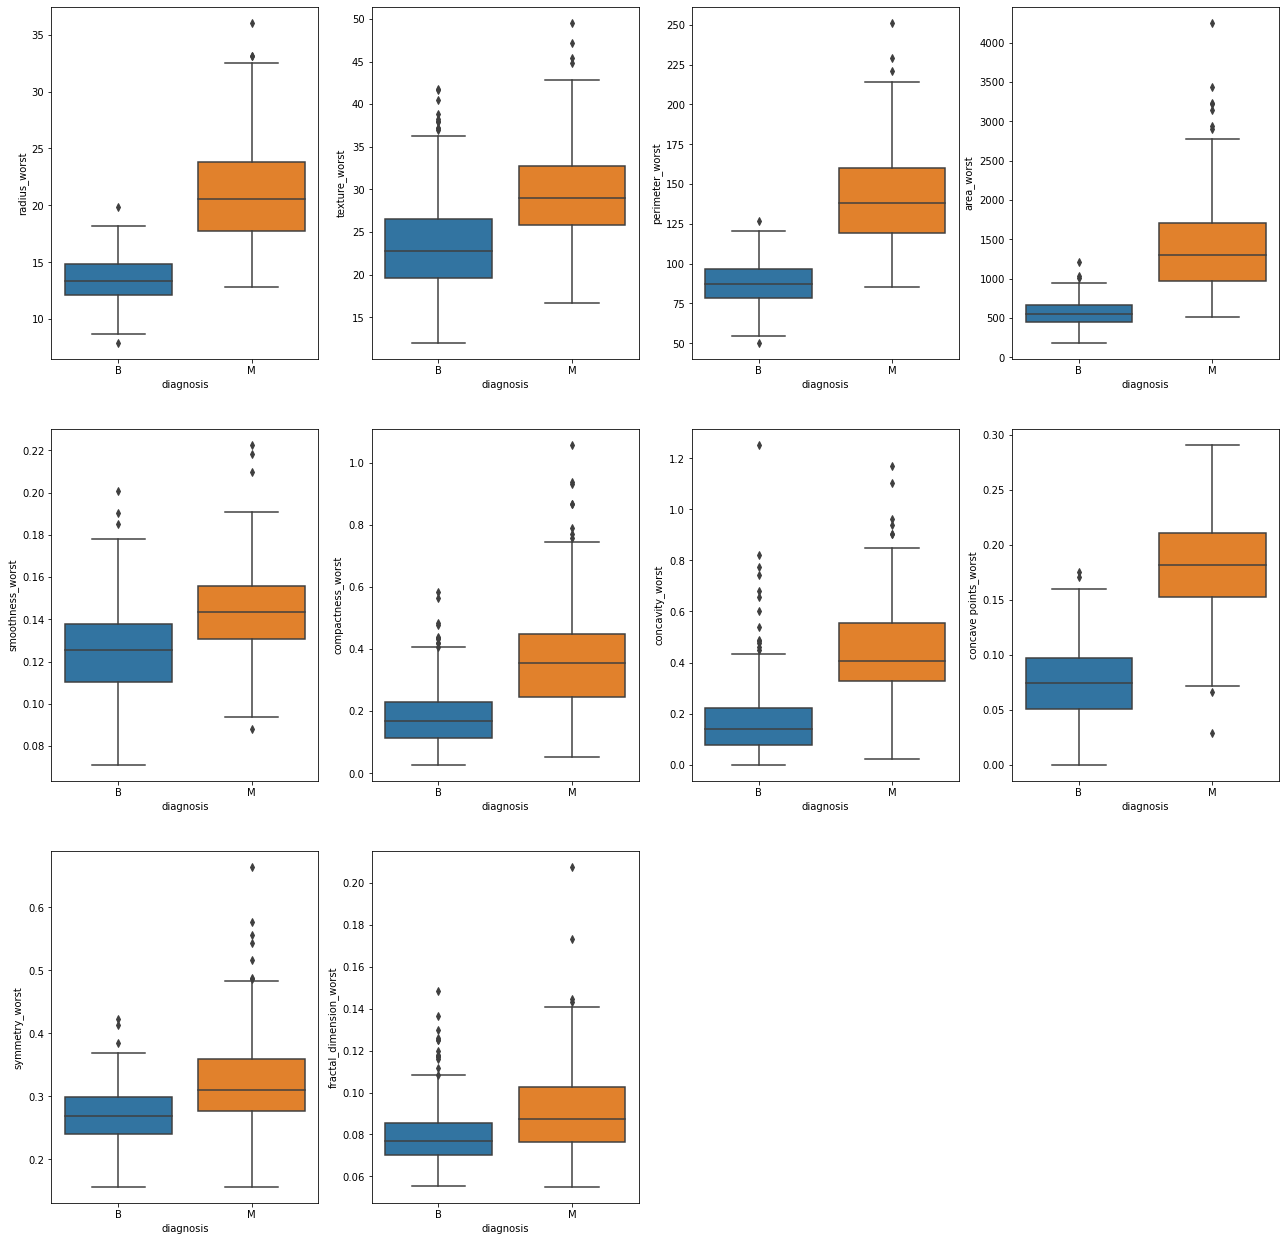

In [24]:
boxplotGridOnDfFiltered('worst', df)

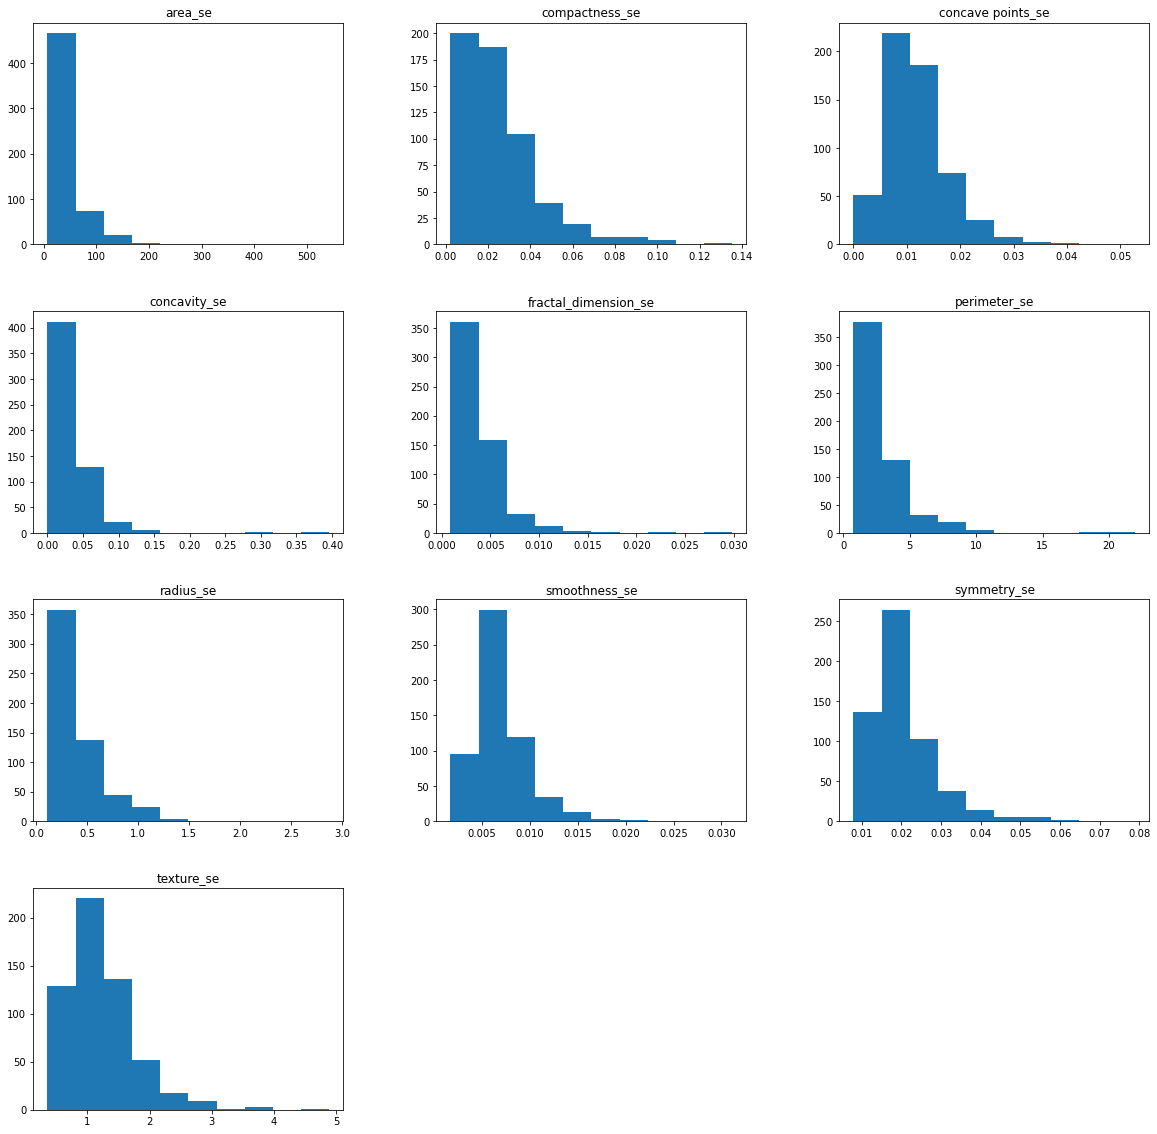

In [25]:
se_axes = df.hist(column=df.filter(regex='se', axis=1).columns, backend='matplotlib', figsize=(20,20), grid=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B53A57A30>,
      dtype=object)

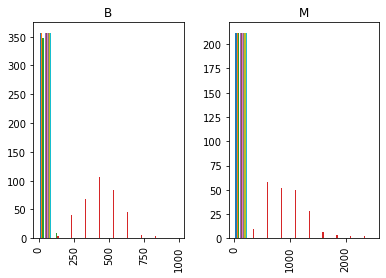

In [26]:
df_mean_values.hist(by='diagnosis')

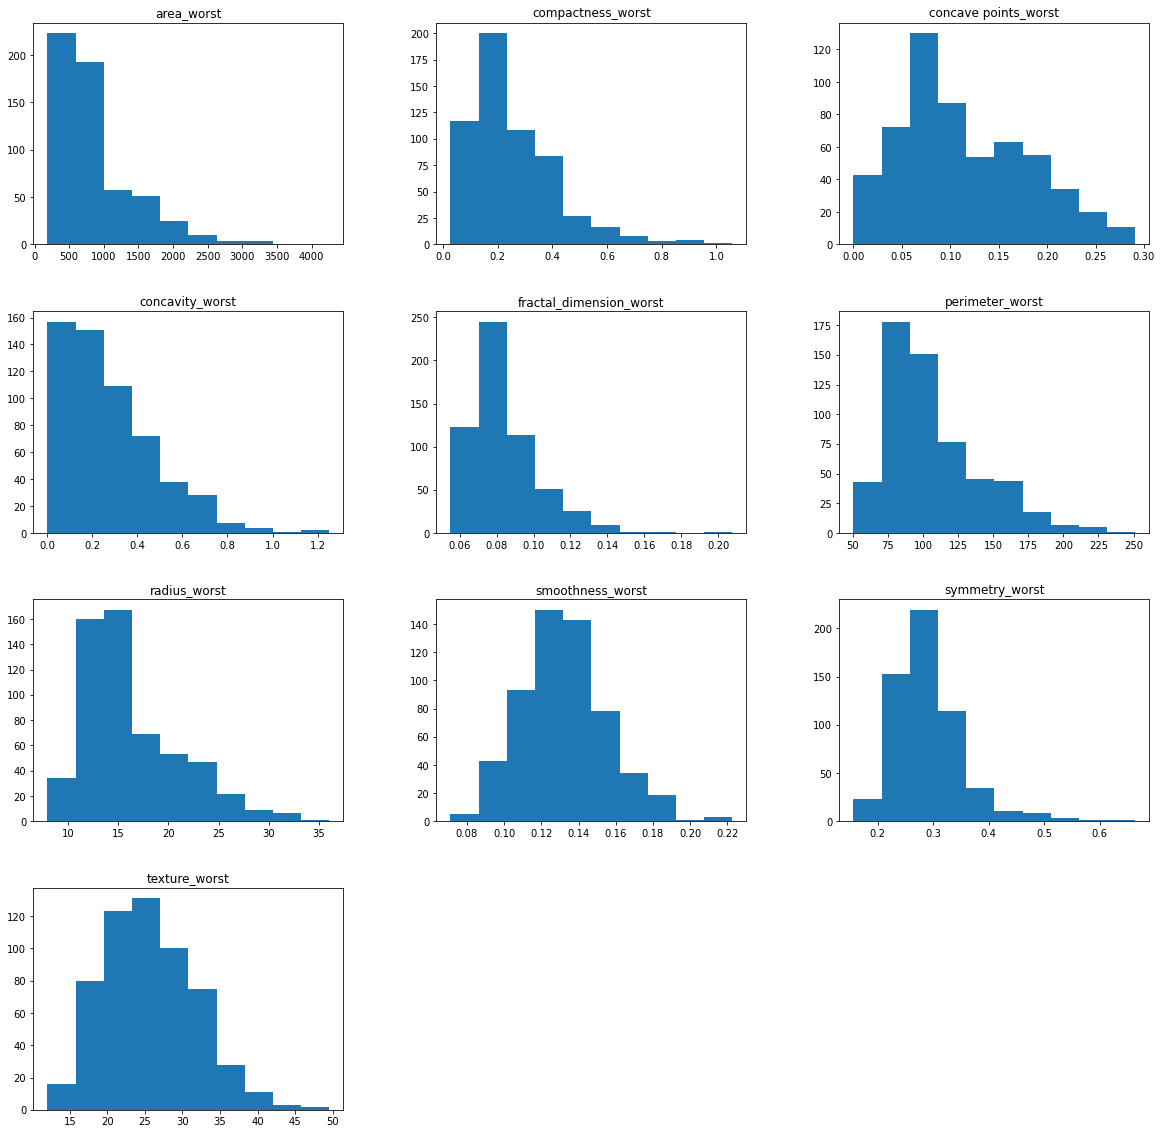

In [27]:
worst_axes = df.hist(column=df.filter(regex='worst', axis=1).columns, backend='matplotlib', figsize=(20,20), grid=False)

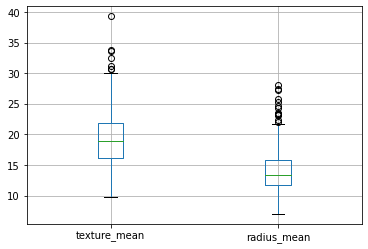

In [28]:
df.boxplot(column=['texture_mean', 'radius_mean'])

(array([223., 193.,  58.,  51.,  25.,  10.,   4.,   4.,   0.,   1.]),
 array([ 185.2 ,  592.08,  998.96, 1405.84, 1812.72, 2219.6 , 2626.48,
        3033.36, 3440.24, 3847.12, 4254.  ]),
 <a list of 10 Patch objects>)

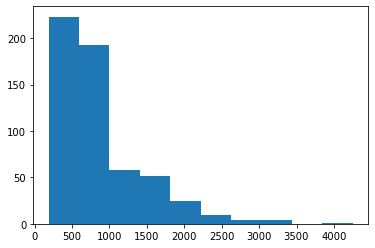

In [29]:
plt.hist(df['area_worst'])

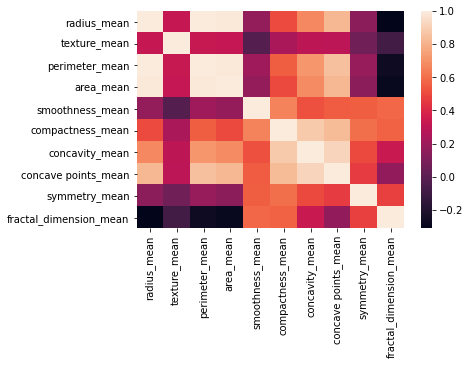

In [30]:
sns.heatmap(df.filter(regex='mean', axis=1).corr())

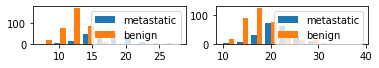

In [21]:
plt.subplot(5,2,1)
plt.hist([metastatic, benign], 10, label=['metastatic', 'benign'])
plt.legend(loc='upper right')

plt.subplot(5,2,2)
metastatic2 = df.loc[df['diagnosis'] == 'M', 'texture_mean']
benign2 = df.loc[df['diagnosis'] == 'B', 'texture_mean']
plt.hist([metastatic2, benign2], 10, label=['metastatic', 'benign'])
plt.legend(loc='upper right')

plt.show()

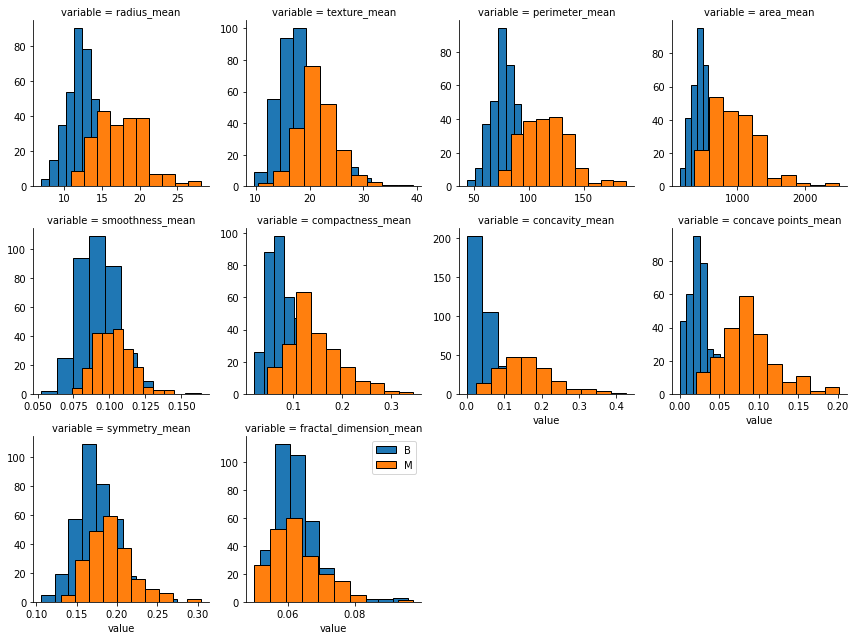

In [17]:

df2 = pd.melt(df_mean_values, id_vars='diagnosis', value_name='value')

grid = sns.FacetGrid(df2, col="variable", hue="diagnosis", col_wrap=4, sharex=False, sharey=False)
grid.map_dataframe(plt.hist, 'value', bins=10, ec="k")

grid.axes[-1].legend()
plt.show()

Inpsect the dataframe number of rows and columns to confirm data has been imported

In [31]:
#assert df.shape == (569,32)

Check the dataframe column names are correct.

In [32]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [33]:
expectedColumns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
    'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst',
    'symmetry_worst', 'fractal_dimension_worst']

In [34]:
columns = []
for column in df.columns:
    if column not in expectedColumns:
        df.drop(column, axis=1, inplace=True)
    else:
        columns.append(column)

print(columns == expectedColumns)

True


In [35]:
df.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
901303,B,16.17,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,0.1990,...,16.97,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.1251,0.3153,0.08960
90312,M,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,...,20.82,30.44,142.00,1313.0,0.1251,0.2414,0.3829,0.1825,0.2576,0.07602
8610862,M,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,...,23.37,31.72,170.30,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
866674,M,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.11490,0.2202,...,22.63,33.58,148.70,1589.0,0.1275,0.3861,0.5673,0.1732,0.3305,0.08465
849014,M,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,...,27.32,30.88,186.80,2398.0,0.1512,0.3150,0.5372,0.2388,0.2768,0.07615
9110127,M,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,...,20.38,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.1535,0.2842,0.08225
851509,M,21.16,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,...,29.17,35.59,188.00,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
899667,M,15.75,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,0.2375,...,17.36,24.17,119.40,915.3,0.1550,0.5046,0.6872,0.2135,0.4245,0.10500
91979701,M,14.27,22.55,93.77,629.8,0.10380,0.11540,0.14630,0.06139,0.1926,...,15.29,34.27,104.30,728.3,0.1380,0.2733,0.4234,0.1362,0.2698,0.08351


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  are

In [37]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [38]:
mask = df['diagnosis'] == 'M'